<a href="https://colab.research.google.com/github/TilakSanghvi/Real_Time_Face_Detection/blob/main/Real_Time_Face_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error: Could not open video.
Total number of unique faces detected: 0


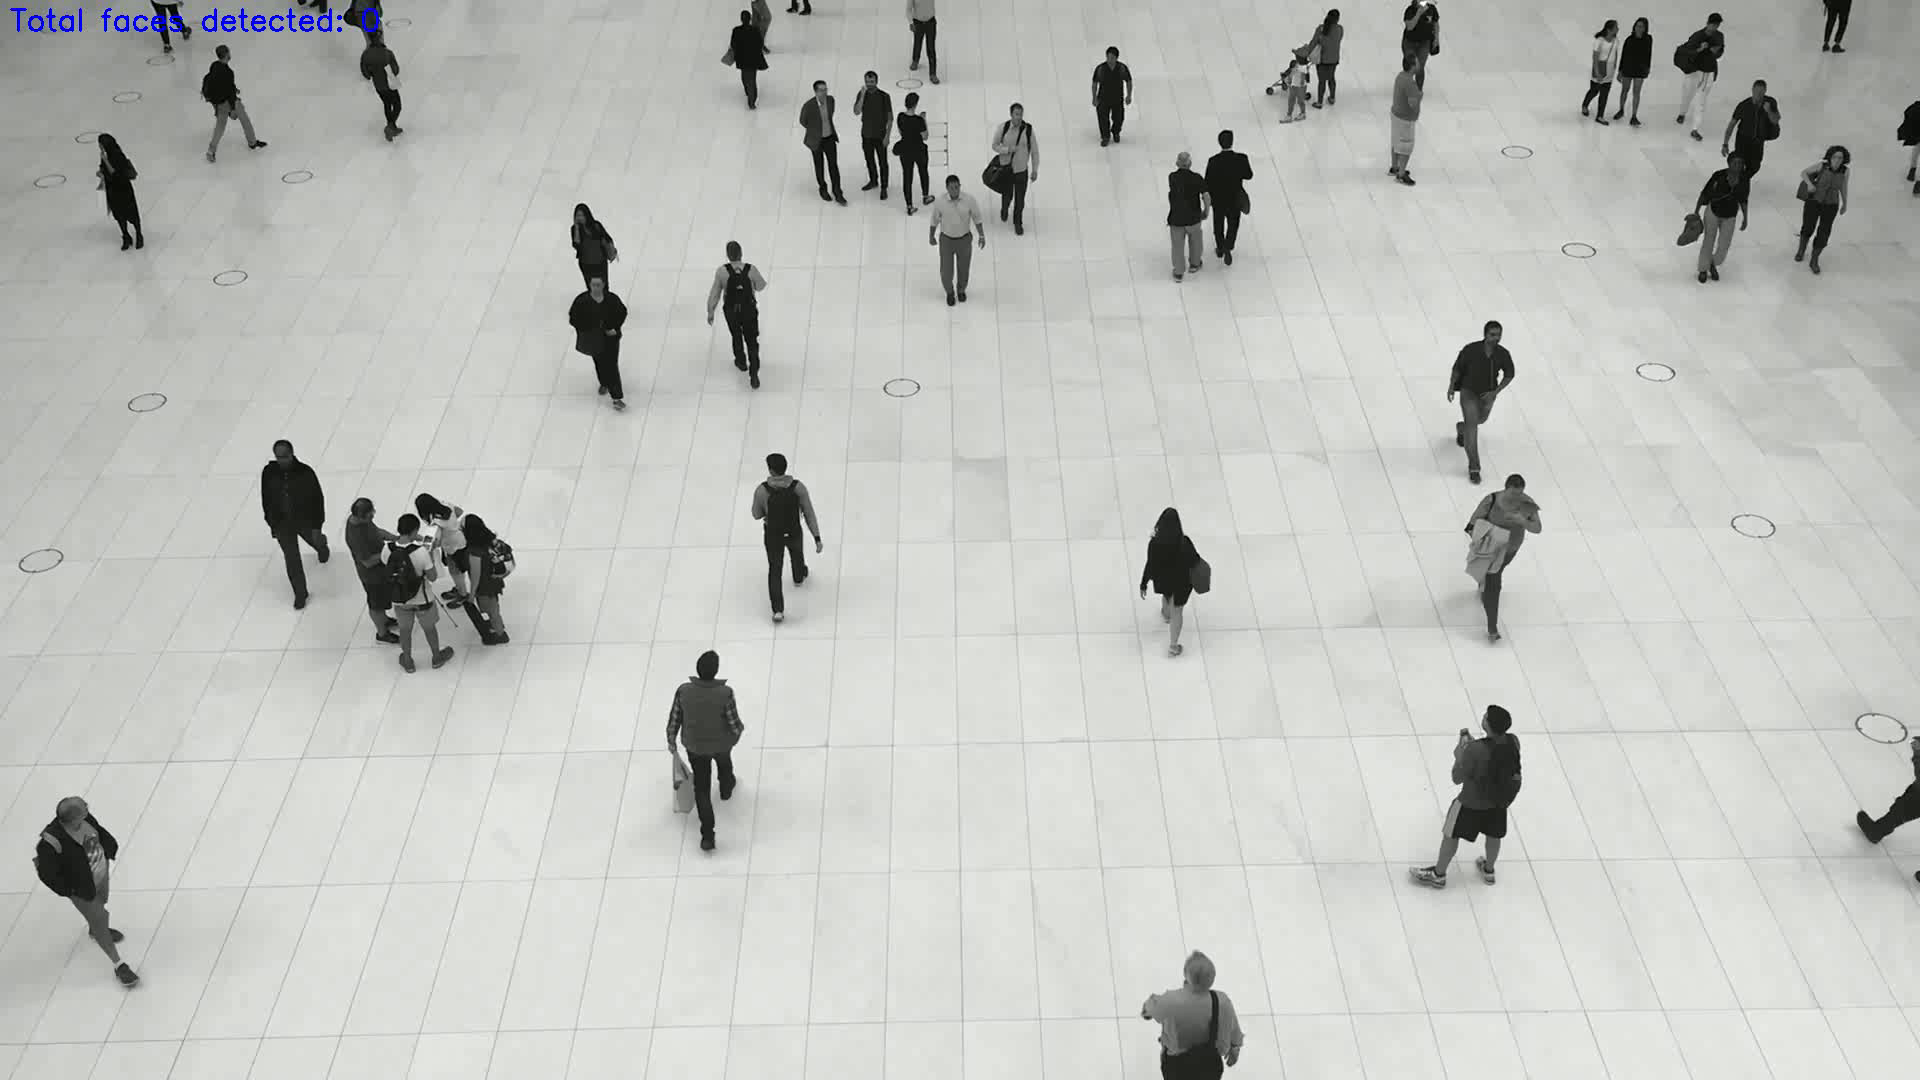

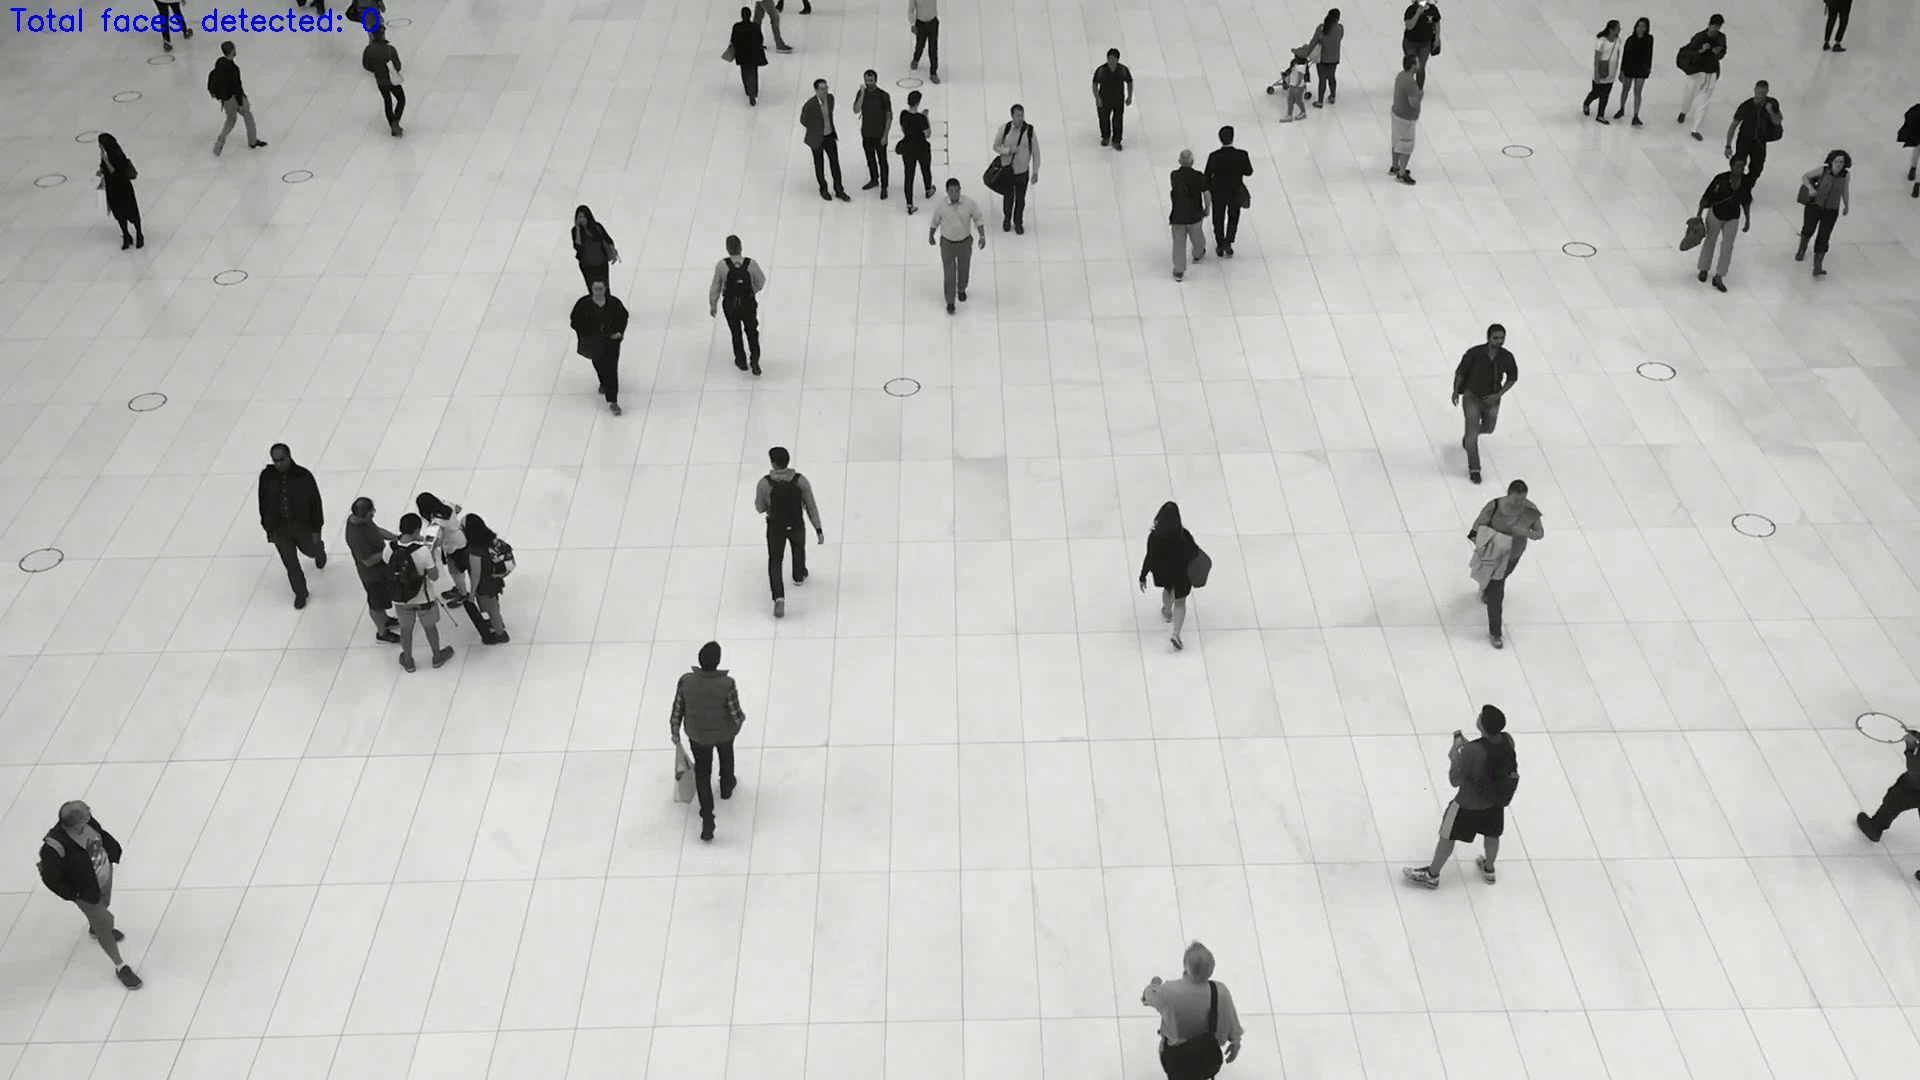

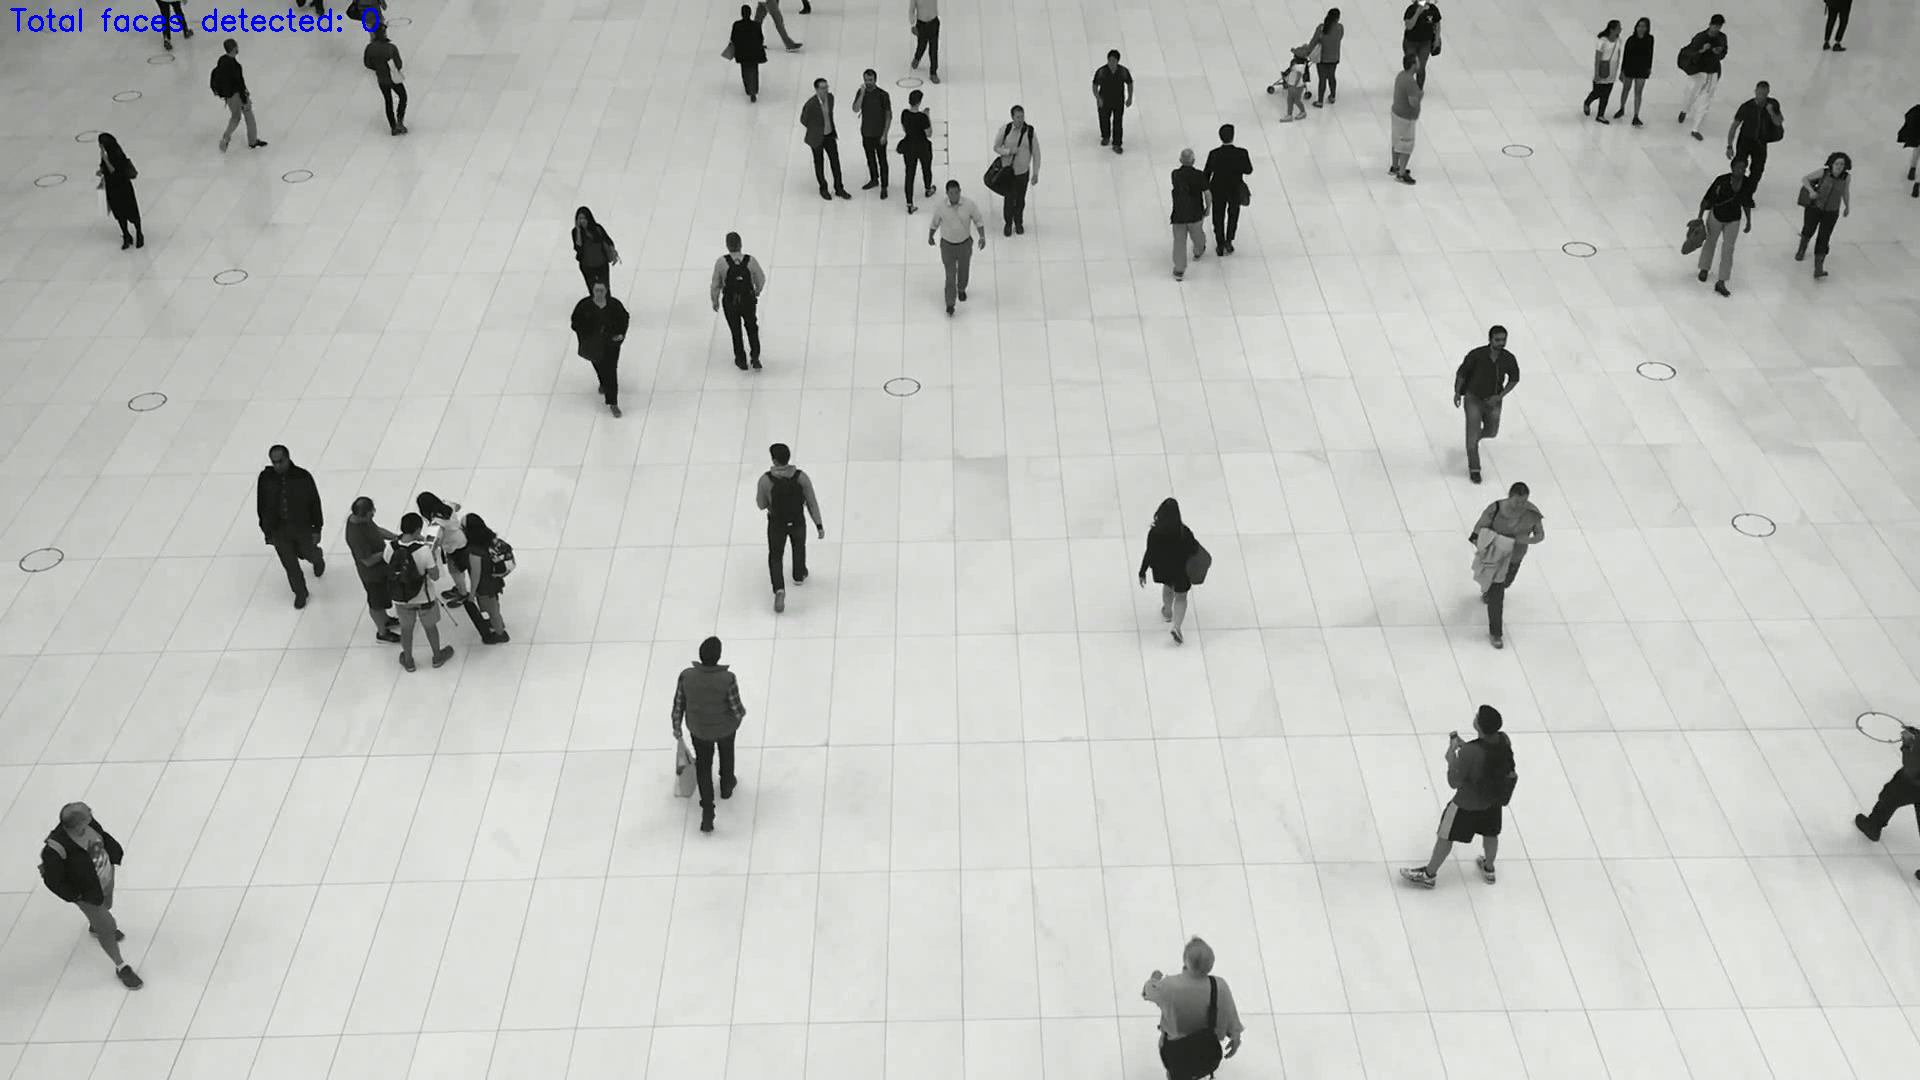

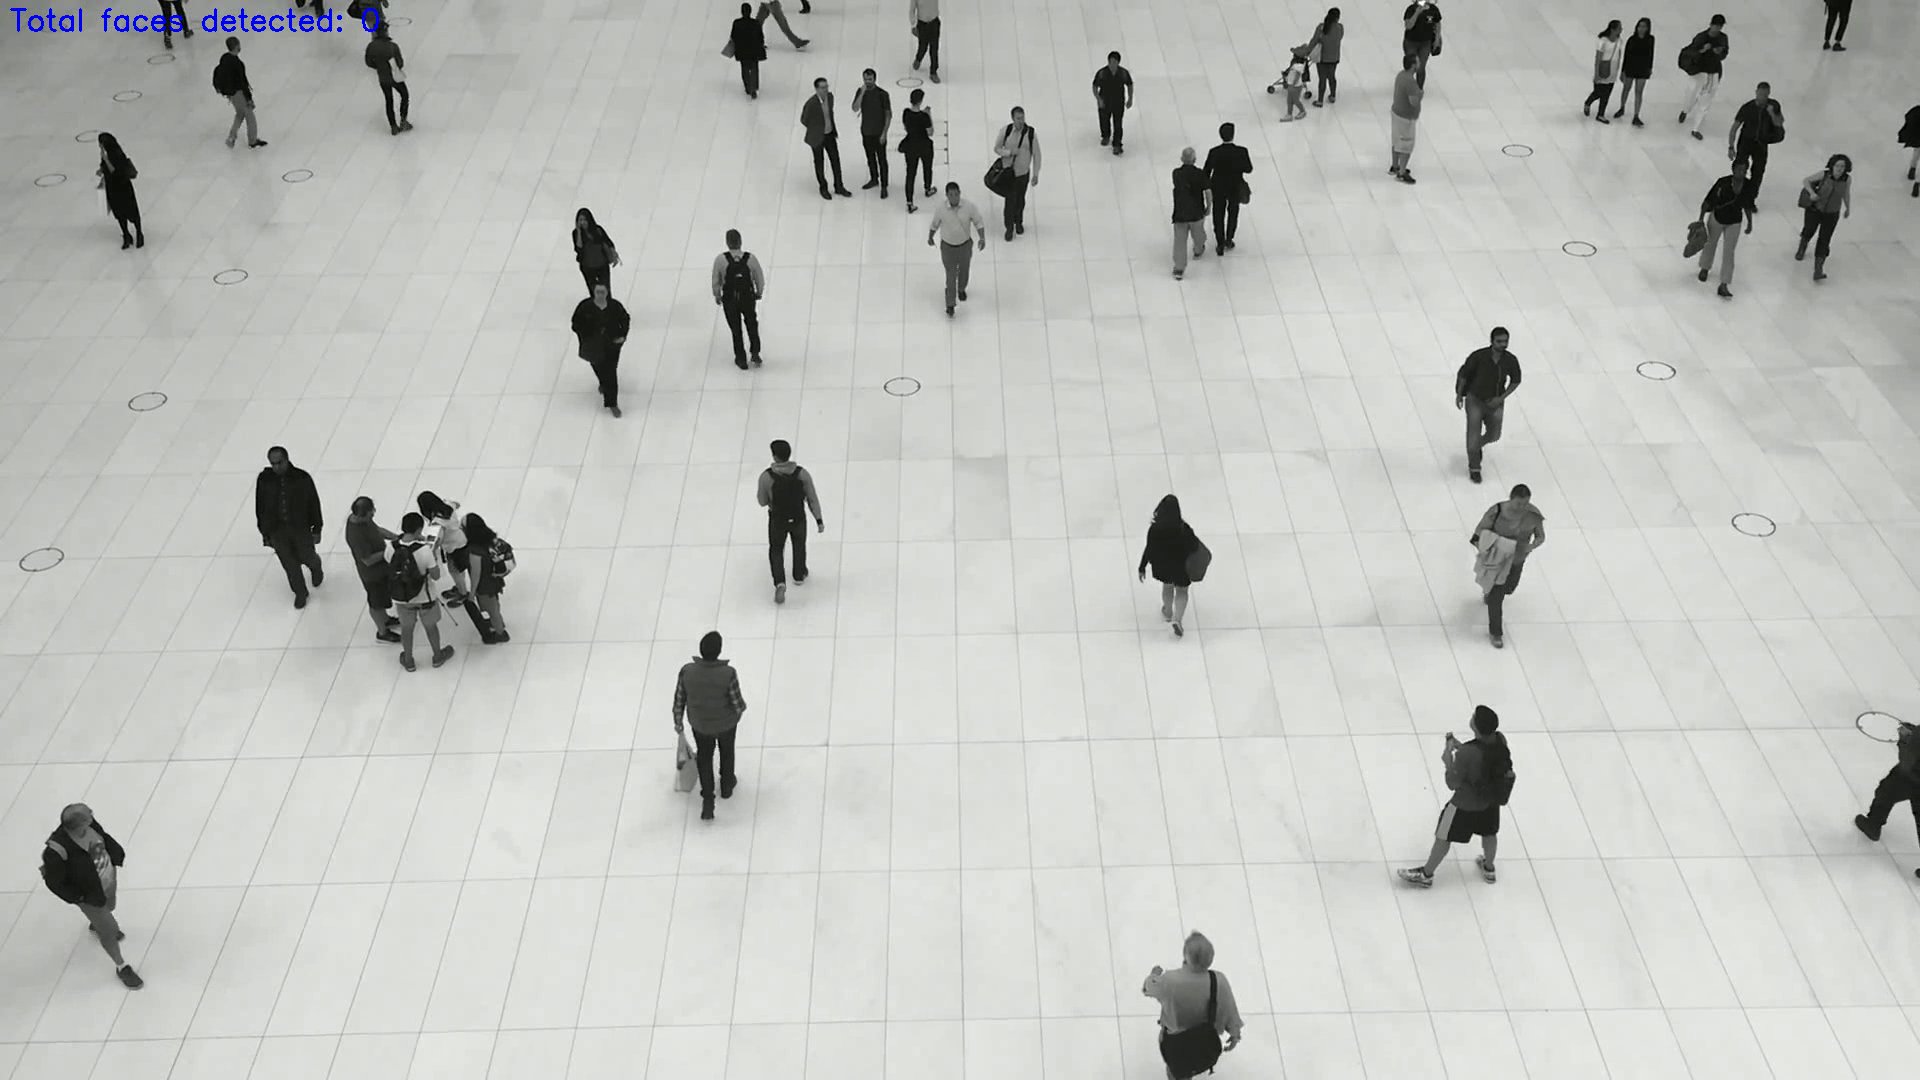

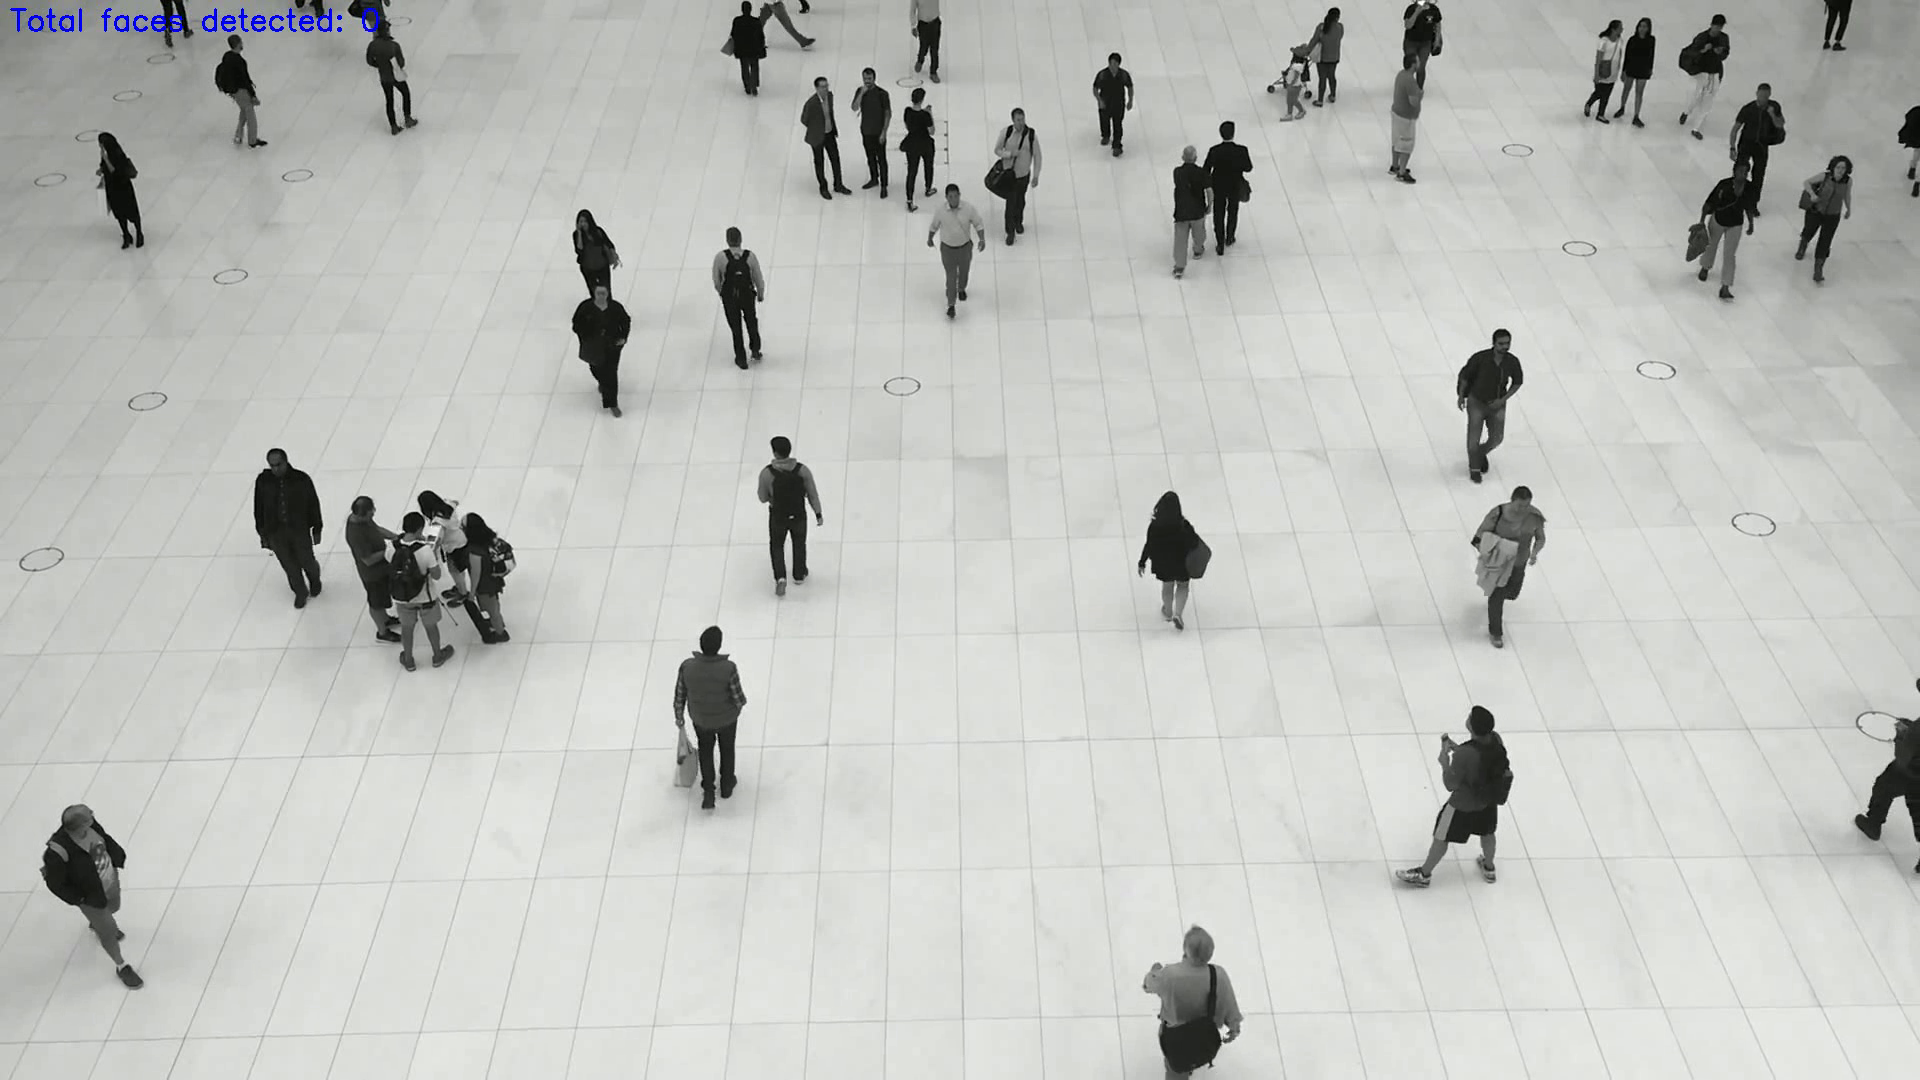

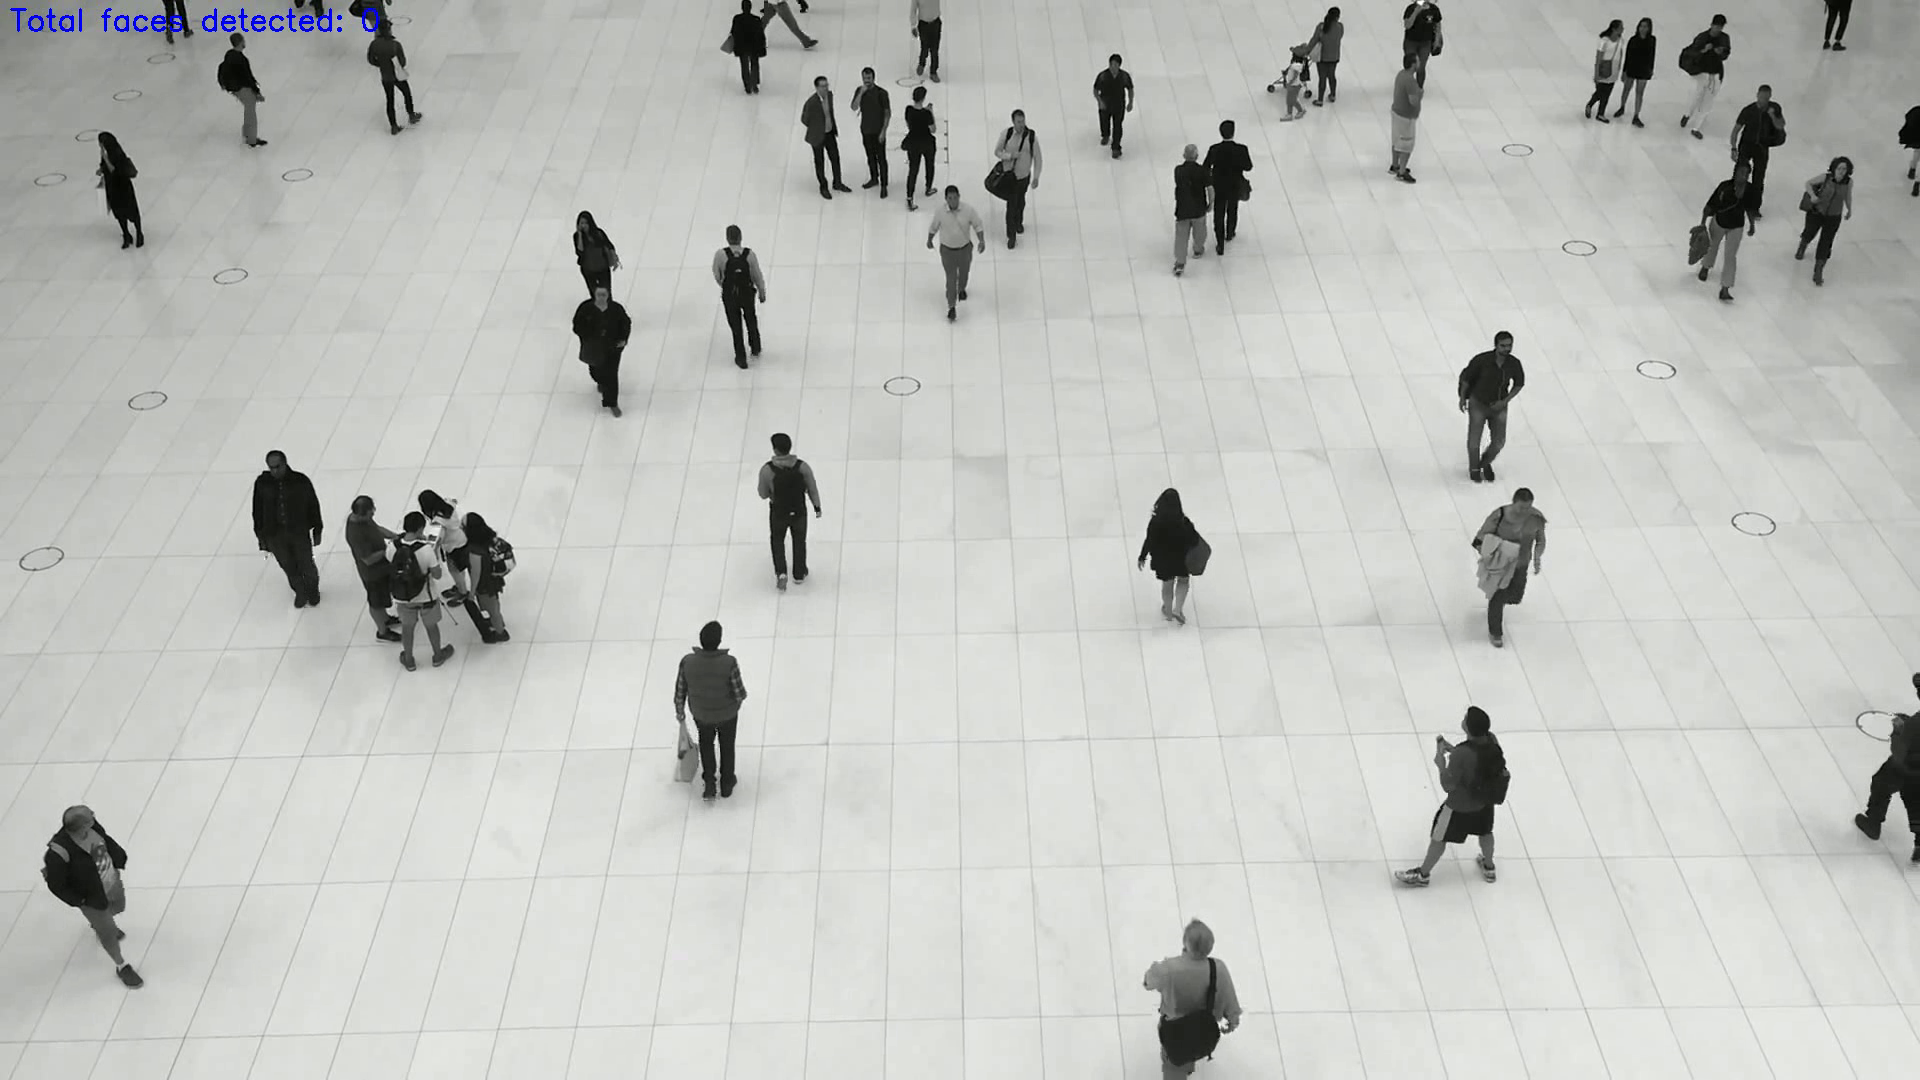

In [ ]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow


cap = cv2.VideoCapture('/content/20200909_193140.mp4')


if not cap.isOpened():
    print("Error: Could not open video.")
    exit()


detector = dlib.get_frontal_face_detector()


fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/output.avi', fourcc, fps, (width, height))

total_faces = 0
unique_faces = set()

while cap.isOpened():
    ret, frame = cap.read()


    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break


    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


    faces = detector(gray)


    for i, face in enumerate(faces):
        x, y = face.left(), face.top()
        x1, y1 = face.right(), face.bottom()
        cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
        cv2.putText(frame, f'face num {i+1}', (x-10, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        unique_faces.add((x, y, x1, y1))  # Add face coordinates to the set


    total_faces = len(unique_faces)


    cv2.putText(frame, f'Total faces detected: {total_faces}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)


    out.write(frame)


    cv2_imshow(frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
out.release()


print(f'Total number of unique faces detected: {total_faces}')


cap = cv2.VideoCapture('/content/output.avi')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
